# Linear Regression with Multiple Variables

Simple linear regression uses a single feature to make a prediction. However, in most real-world scenarios, you have multiple factors that influence the outcome. 

For example, a house price isn't just determined by its size but also by the number of bedrooms, number of floors, and age of the home.

<a name="toc_15456_1.3"></a>
## Notation

| General Notation | Description | Python (if applicable) |
|:-----------------|:------------|:-----------------------|
| $a$              | Scalar (non-bold) | `a` |
| **a**            | Vector (bold lowercase) | `a` |
| **A**            | Matrix (bold capital) | `A` |
    
| **Regression**   |              |                       |
|:-----------------|:-------------|:----------------------|
| $\boldsymbol{X}$ | Training example matrix | `X_train` |
| $\boldsymbol{y}$ | Training targets | `y_train` |
| $\boldsymbol{x}^{(i)}, y^{(i)}$ | $i$-th training example | `X[i]`, `y[i]` |
| $m$              | Number of training examples | `m` |
| $n$              | Number of features per example | `n` |
| $\boldsymbol{w}$ | Model parameters: weights | `w` |
| $b$              | Model parameter: bias | `b` |
| $f_{\boldsymbol{w},b}(\boldsymbol{x}^{(i)})$ | Model output for $i$-th example: $f(\boldsymbol{x}^{(i)}) = \boldsymbol{w}\cdot\boldsymbol{x}^{(i)}+b$ | `f_wb = np.dot(w, X[i]) + b` |
| $\frac{\partial J(\boldsymbol{w},b)}{\partial w_j}$ | Gradient (partial derivative of cost w.r.t. weight $w_j$) | `dj_dw[j]` |
| $\frac{\partial J(\boldsymbol{w},b)}{\partial b}$ | Gradient (partial derivative of cost w.r.t. bias $b$) | `dj_db` |

The model's hypothesis for multiple features is an extension of the single-variable model:

f_w,b(x⃗) = w₁x₁ + w₂x₂ + ... + wₙxₙ + b

Using vector notation, this can be written much more concisely. If we define **w⃗** as the vector of weights and **x⃗** as the vector of features, 

the model can be expressed as a dot product:

f_w,b(x⃗) = **w⃗** ⋅ **x⃗** + b

This is known as **Multiple Linear Regression**.

## 1.Vectorization

Vectorization is the practice of using optimized, low-level numerical computing libraries (like NumPy in Python) to perform mathematical operations on entire arrays or vectors instead of iterating through elements one by one. 

**Why use vectorization?**
1.  **Speed:** Operations are executed much faster because the underlying implementations are written in compiled languages (like C or Fortran). They can also leverage parallel processing capabilities of modern CPUs.
2.  **Simplicity:** The code becomes much more concise and readable, closely resembling the mathematical notation.

For example, instead of computing the model's prediction with a `for` loop, you can use `np.dot()`.

In [22]:
import numpy as np
import time

# Sample data
n = 10000000
w = np.random.rand(n)
x = np.random.rand(n)
b = 0.5

# --- 1. Loop Approach ---
start = time.time()
f_loop = sum(w[j] * x[j] for j in range(n)) + b
end = time.time()
print(f"Loop result: {f_loop:.4f}, Time: {end - start:.6f} s")

# --- 2. Vectorized Approach ---
start = time.time()
f_vec = np.dot(w, x) + b
end = time.time()
print(f"Vectorized result: {f_vec:.4f}, Time: {end - start:.6f} s")

Loop result: 2500474.5287, Time: 4.613082 s
Vectorized result: 2500474.5287, Time: 0.007086 s



## 2.Model Prediction With Multiple Variables
The model's prediction with multiple variables is given by the linear model:

$$ f_{\mathbf{w},b}(\mathbf{x}) =  w_0x_0 + w_1x_1 +... + w_{n-1}x_{n-1} + b \tag{1}$$
or in vector notation:
$$ f_{\mathbf{w},b}(\mathbf{x}) = \mathbf{w} \cdot \mathbf{x} + b  \tag{2} $$ 
where $\cdot$ is a vector `dot product`

To demonstrate the dot product, we will implement prediction using (1) and (2).

### Matrix X_train 
Similar to the table above, examples are stored in a NumPy matrix `X_train`. Each row of the matrix represents one example. When you have $m$ training examples ( $m$ is three in our example), and there are $n$ features (four in our example), $\mathbf{X}$ is a matrix with dimensions ($m$, $n$) (m rows, n columns).


$$\mathbf{X} = 
\begin{pmatrix}
 x^{(0)}_0 & x^{(0)}_1 & \cdots & x^{(0)}_{n-1} \\ 
 x^{(1)}_0 & x^{(1)}_1 & \cdots & x^{(1)}_{n-1} \\
 \cdots \\
 x^{(m-1)}_0 & x^{(m-1)}_1 & \cdots & x^{(m-1)}_{n-1} 
\end{pmatrix}
$$
notation:
- $\mathbf{x}^{(i)}$ is vector containing example i. $\mathbf{x}^{(i)}$ $ = (x^{(i)}_0, x^{(i)}_1, \cdots,x^{(i)}_{n-1})$
- $x^{(i)}_j$ is element j in example i. The superscript in parenthesis indicates the example number while the subscript represents an element.

### Parameter vector w, b

* $\mathbf{w}$ is a vector with $n$ elements.
  - Each element contains the parameter associated with one feature.
  - in our dataset, n is 4.
  - notionally, we draw this as a column vector

$$\mathbf{w} = \begin{pmatrix}
w_0 \\ 
w_1 \\
\cdots\\
w_{n-1}
\end{pmatrix}
$$
* $b$ is a scalar parameter.  

## 2.Import necessary libraries

In [23]:
# Import necessary libraries
import numpy as np                    # For numerical operations and array handling
import pandas as pd                   # For data manipulation and analysis
import matplotlib.pyplot as plt       # For data visualization

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries imported successfully!")

Libraries imported successfully!


## 3.Creating Sample Data

In [24]:
# Set random seed for reproducibility
np.random.seed(42)

# Generate x_train: 100 samples, 4 features
X_train = np.random.rand(100, 4)

# True weights and bias for simulation
true_w = np.array([[1.5], [2.0], [-1.0], [0.5]])  # shape (4,1)
true_b = 3.0

# Generate y_train using linear combination + Gaussian noise
noise = np.random.randn(100, 1) * 0.5  # noise with std deviation 0.5
y_train = X_train @ true_w + true_b + noise  # shape (100,1)

# Check shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Optional: first 5 rows
print("X_train[:5]:\n", X_train[:5])
print("y_train[:5]:\n", y_train[:5])

X_train shape: (100, 4)
y_train shape: (100, 1)
X_train[:5]:
 [[0.37454012 0.95071431 0.73199394 0.59865848]
 [0.15601864 0.15599452 0.05808361 0.86617615]
 [0.60111501 0.70807258 0.02058449 0.96990985]
 [0.83244264 0.21233911 0.18182497 0.18340451]
 [0.30424224 0.52475643 0.43194502 0.29122914]]
y_train[:5]:
 [[5.68331349]
 [3.93152338]
 [6.12316459]
 [4.42808609]
 [4.38162896]]


## 4.Compute Cost With Multiple Variables
The equation for the cost function with multiple variables $J(\mathbf{w},b)$ is:
$$J(\mathbf{w},b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2 \tag{3}$$ 
where:
$$ f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = \mathbf{w} \cdot \mathbf{x}^{(i)} + b  \tag{4} $$ 


In contrast to previous labs, $\mathbf{w}$ and $\mathbf{x}^{(i)}$ are vectors rather than scalars supporting multiple features.

In [25]:
def compute_cost(X, y, w, b):
    """
    Computes the cost function for multiple linear regression.
    """
    m = X.shape[0]
    predictions = X.dot(w) + b
    cost = np.sum((predictions - y) ** 2)
    total_cost = (1 / (2 * m)) * cost
    return total_cost

## 5.Gradient Descent With Multiple Variables
Gradient descent for multiple variables:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline\;
& w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \tag{5}  \; & \text{for j = 0..n-1}\newline
&b\ \ = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$

where, n is the number of features, parameters $w_j$,  $b$, are updated simultaneously and where  

$$
\begin{align}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \tag{6}  \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) \tag{7}
\end{align}
$$
* m is the number of training examples in the data set

    
*  $f_{\mathbf{w},b}(\mathbf{x}^{(i)})$ is the model's prediction, while $y^{(i)}$ is the target value


In [26]:
def compute_gradient(X, y, w, b):
    """
    Computes the gradients for w and b.
    """
    m, n = X.shape
    
    # Calculate the error
    err = (X.dot(w) + b) - y
    
    # Calculate gradients
    dj_dw = (1/m) * X.T.dot(err)
    dj_db = (1/m) * np.sum(err)
    
    return dj_dw, dj_db

def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    """
    Performs gradient descent to learn w and b.
    """
    w = w_in.copy() # Avoid modifying global w
    b = b_in
    J_history = []
    
    for i in range(num_iters):
        # Calculate the gradient
        dj_dw, dj_db = compute_gradient(X, y, w, b)
        
        # Update parameters
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost at each iteration
        J_history.append(compute_cost(X, y, w, b))
        
        if i % (num_iters // 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}")
            
    return w, b, J_history

In [27]:
# --- Initialize parameters correctly ---
w_init = np.zeros((X_train.shape[1], 1))  # number of features
b_init = 0.0
alpha = 0.1
iterations = 1000

# --- Run gradient descent ---
w_final, b_final, J_history = gradient_descent(X_train, y_train, w_init, b_init, alpha, iterations)

# --- Print results ---
print("\nLearned parameters:")
print("w =", w_final.ravel())
print("b =", b_final)

print("\nFinal cost:", J_history[-1])

Iteration    0: Cost     6.80
Iteration  100: Cost     0.15
Iteration  200: Cost     0.11
Iteration  300: Cost     0.10
Iteration  400: Cost     0.10
Iteration  500: Cost     0.10
Iteration  600: Cost     0.10
Iteration  700: Cost     0.10
Iteration  800: Cost     0.10
Iteration  900: Cost     0.10

Learned parameters:
w = [ 1.72492113  1.69750405 -0.92165137  0.38308205]
b = 3.073798748761816

Final cost: 0.09569923041020109


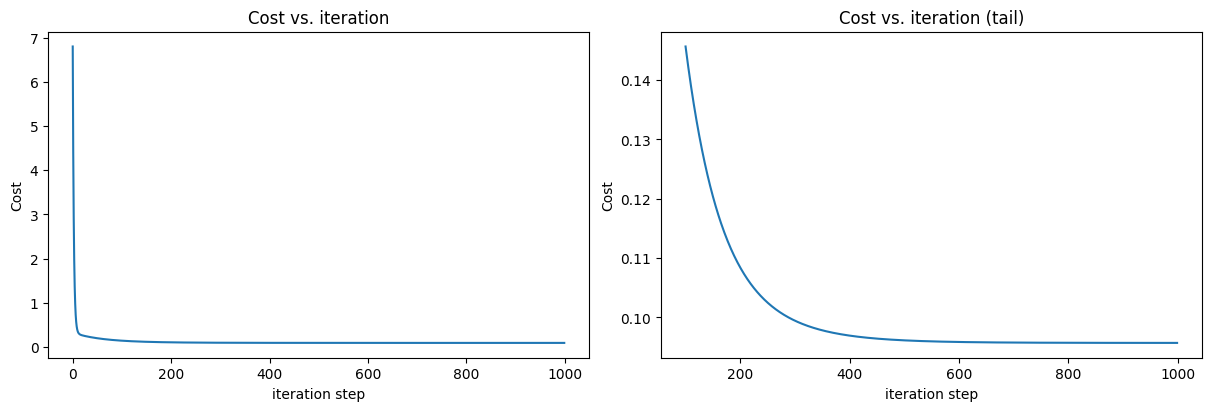

In [28]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

## 8.Model Evaluation

#### I. Mean Squared Error (MSE)
MSE = (1/m) × Σ(actual - predicted)²


#### II. R² Score (R-squared or Coefficient of Determination)
- Proportion of variance in the dependent variable explained by the model
- **Range**: 0 to 1 (can be negative for very poor models)
- **Interpretation**:
  - **1.0** = Perfect fit (model explains 100% of variance)
  - **0.8 - 1.0** = Strong model
  - **0.5 - 0.8** = Moderate model
  - **< 0.5** = Weak model
  - **Higher is better**


In [33]:
def compute_model_output(X, w, b):
    return np.dot(X, w) + b

y_pred = compute_model_output(X_train, w_final, b_final)

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"\nR² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.19

R² Score: 0.7626


# Multiple Linear Regression using Scikit-Learn

In [46]:
# Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Step 2: Mock dataset loader (replace with your real data)
# Generate x_train: 100 samples, 4 features
X_train = np.random.rand(100, 4)

# True weights and bias for simulation
true_w = np.array([[1.5], [2.0], [-1.0], [0.5]])  # shape (4,1)
true_b = 3.0

# Generate y_train using linear combination + Gaussian noise
noise = np.random.randn(100, 1) * 0.5  # noise with std deviation 0.5
y_train = X_train @ true_w + true_b + noise  # shape (100,1)

# Step 4: Train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Step 5: Extract model parameters
b = linear_model.intercept_
w = linear_model.coef_
w = w.reshape(-1)       # Convert to (n,)
#w = w.ravel()
print(f"Learned model parameters:\n w = {w}, b = {b}\n")

# Step 6: Predictions on training set
y_pred2 = linear_model.predict(X_train)
print(f"Prediction on training set (first 4):\n {y_pred2[:4]}")
print(f"Prediction using manual computation w*x + b (first 4):\n {(X_train @ w + b)[:4]}")
print(f"Target values (first 4):\n {y_train[:4]}\n")

Learned model parameters:
 w = [ 1.01279243  1.7767442  -1.06821241  0.50720955], b = [3.34176637]

Prediction on training set (first 4):
 [[3.85919778]
 [4.37871177]
 [3.48068129]
 [5.41232906]]
Prediction using manual computation w*x + b (first 4):
 [3.85919778 4.37871177 3.48068129 5.41232906]
Target values (first 4):
 [[4.9581257 ]
 [4.83104869]
 [3.49469061]
 [5.80998558]]



In [47]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_train, y_pred2)
r2 = r2_score(y_train, y_pred2)
print(f"\nMean Squared Error (MSE): {mse:.2f}")
print(f"\nR² Score: {r2:.4f}")


Mean Squared Error (MSE): 0.27

R² Score: 0.6061
